# Heart Attack Dataset (Exploratory Data Analysis and Prediction)

O que será utilizado:
1. Pandas para leitura da base de dados;
2. Matplotlib para criação de gráficos;
3. Sklearn Linear Model para Regressão Linear Múltipla

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Base de dados

In [97]:
df = pd.read_csv("Medicaldataset.csv")

# Análise Exploratória dos Dados (EDA)

In [98]:
# Primeiras 5 linhas do Dataset
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [99]:
# Informações gerais do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [100]:
# Descrição do dataset com contagem, média, etc
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [101]:
# Dimensões do Dataset
print(f"Dimensões do Dataset: {df.shape[0]} linhas e {df.shape[1]} colunas.") # É possível observar que é um dataset bidimensional

Dimensões do Dataset: 1319 linhas e 9 colunas.


In [102]:
# Quantidade de elementos do Dataset
print(f"Quantidade de elementos do Dataset: {df.size} elementos.")

Quantidade de elementos do Dataset: 11871 elementos.


In [103]:
# Verificando valores nulos
df.isnull().sum() # É possível verificar que não há valores nulos no Dataset

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [104]:
# Verificando se há linhas duplicadas
df.duplicated().sum()

np.int64(0)

# Distribuição de Resultados de Ataques Cardíacos Gerais

<BarContainer object of 2 artists>

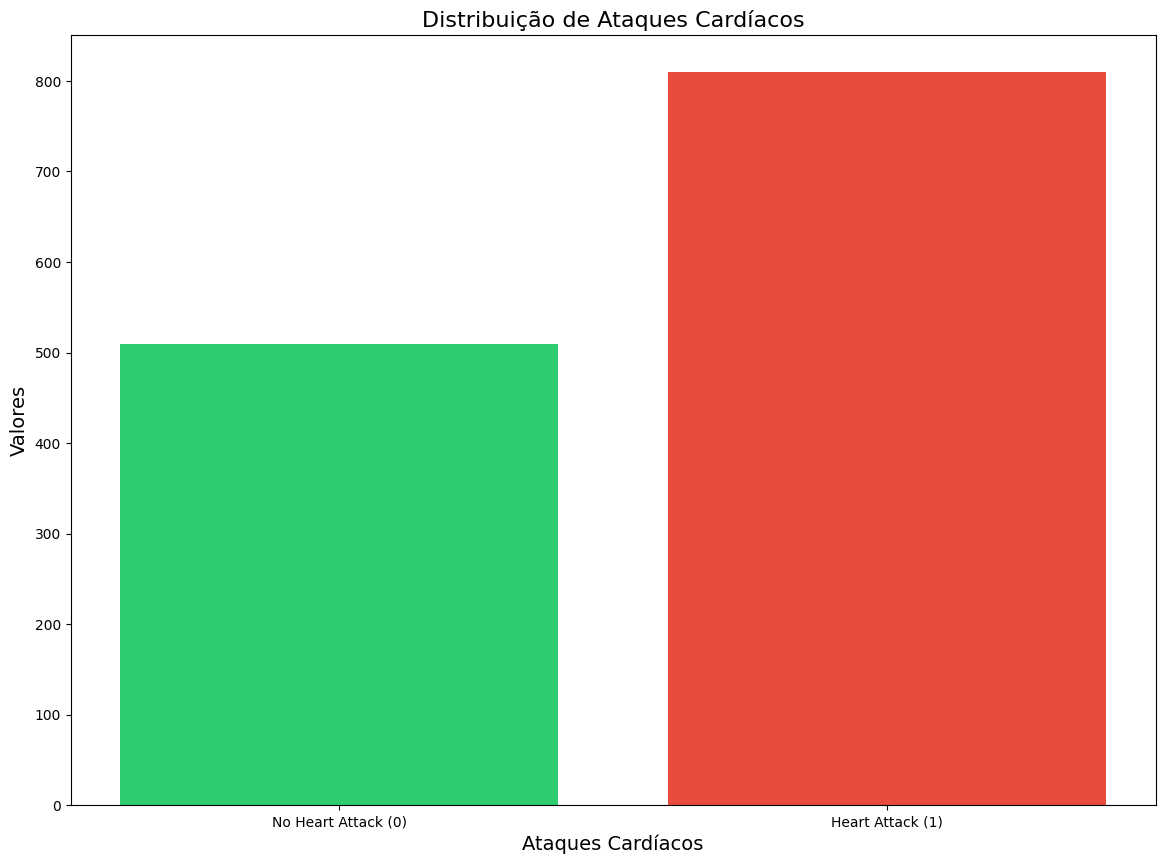

In [105]:
# Criando gráfico de porcentagem de resultados de ataques cardíacos
resultados = df['Result'].value_counts().sort_index()
label_resultados = ['No Heart Attack (0)', 'Heart Attack (1)']
cores = ['#2ecc71', '#e74c3c']

# Criando o gráfico
plt.figure(figsize= (14, 10))
plt.title("Distribuição de Ataques Cardíacos", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, resultados.values, color=cores)


# Distribuição de Resultados de Ataques Cardíacos por Gênero

In [106]:
# Dataframe contendo apenas Gênero e Resultado
gender_df = df[['Gender', 'Result']]

# male_df -> Armazena apenas os resultados positivos e negativos do gênero masculino
# female_df -> Armazena apenas os resultados positivos e negativos do gênero feminino
male_df = gender_df.query('Gender == 1')
female_df = gender_df.query('Gender == 0')

# Quantidade de resultados por tipo (ex: x negativos, y positivos)
male_results = male_df.value_counts().sort_index()
female_results = female_df.value_counts().sort_index()

<BarContainer object of 2 artists>

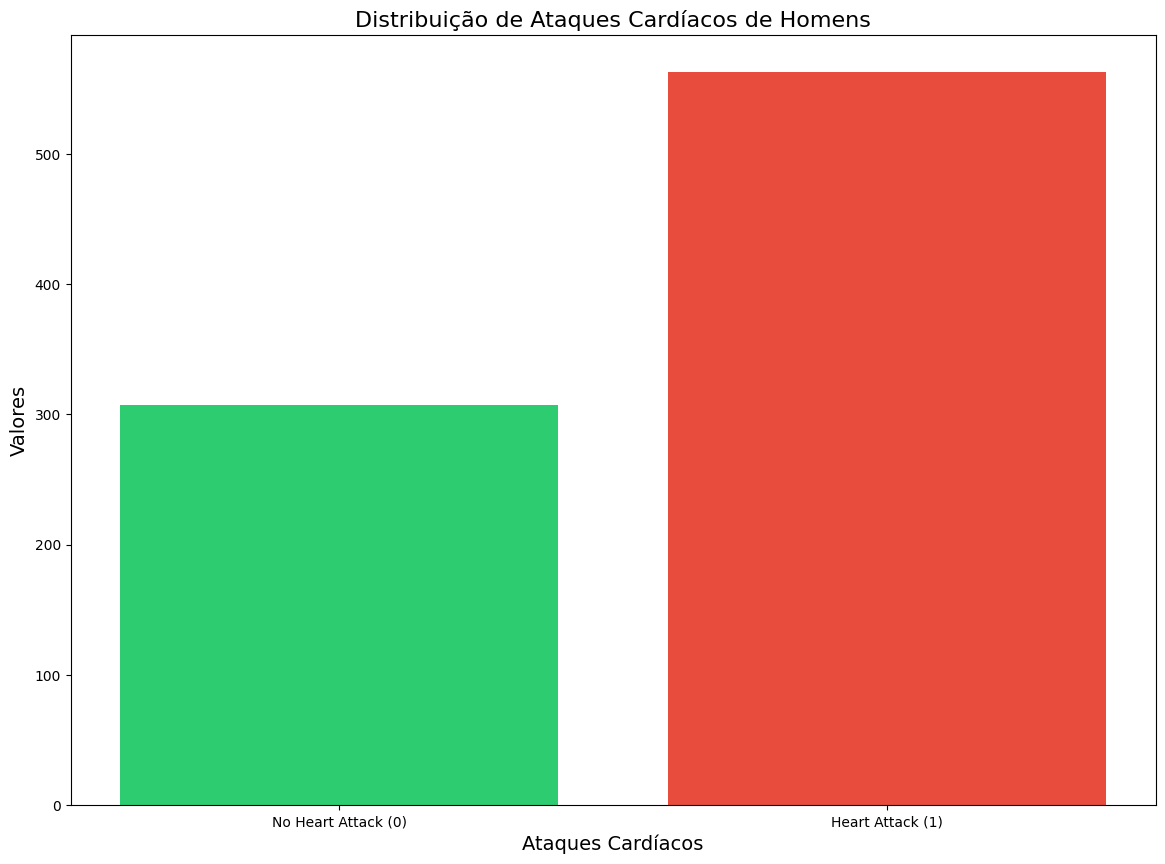

In [107]:
# Criação de gráfico contendo os resultados masculinos
plt.figure(figsize= (14, 10))
plt.title("Distribuição de Ataques Cardíacos de Homens", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, male_results.values, color=cores)

<BarContainer object of 2 artists>

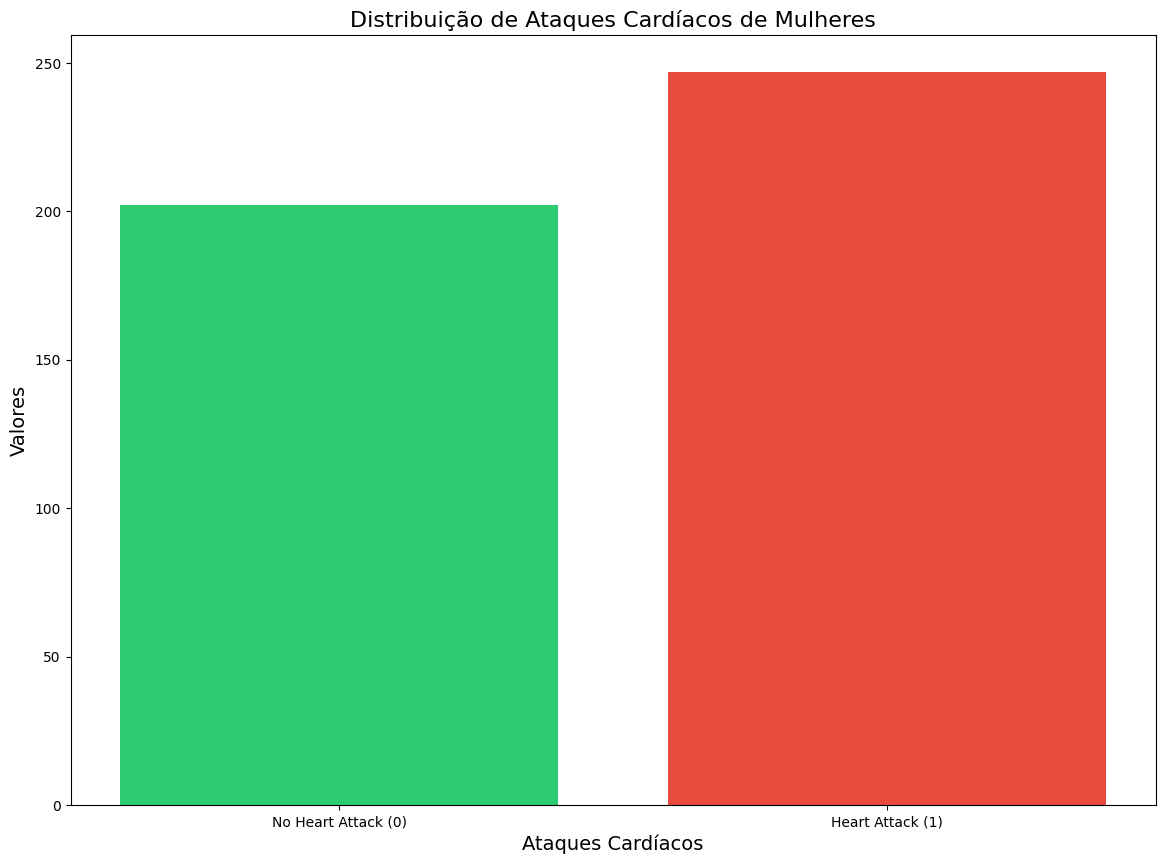

In [108]:
# Criação do gráfico contendo resultados femininos
plt.figure(figsize= (14, 10))
plt.title("Distribuição de Ataques Cardíacos de Mulheres", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, female_results.values, color=cores)

# Sumário dos resultados masculinos e femininos

In [126]:
# Armazena os testes positivos e negativos de mulheres
female_negative = female_df.query('Result == "negative"')
female_positive = female_df.query('Result == "positive"')

# Porcentagem de mulheres com teste positivo
female_positive_percentage = ((female_positive['Result'].count() / female_df['Result'].count()) * 100).round(2)
female_negative_percentage = ((female_negative['Result'].count() / female_df['Result'].count()) * 100).round(2)

# Armazena os testes positivos e negativos de homens
male_negative = male_df.query('Result == "negative"')
male_positive = male_df.query('Result == "positive"')

# Porcentagem de homens
male_positive_percentage = ((male_positive['Result'].count() / male_df['Result'].count()) * 100).round(2)
male_negative_percentage = ((male_negative['Result'].count() / male_df['Result'].count()) * 100).round(2)

# Printa a quantidade de homens, quantidade de ataques cardíacos positivos e negativos
print("=============================================================================")
print(f"Quantidade total de homens: {male_results.sum()}")
print(f"Porcentagem de homens que tiveram ataques cardíacos: {male_positive_percentage}% ({male_positive['Result'].count()} homens)")
print(f"Quantidade de homens que não tiveram ataques cardíacos: {male_negative_percentage}% ({male_negative['Result'].count()} homens)")
print("=============================================================================")
# Printa a quantidade de mulheres, quantidade de ataques cardíacos positivos e negativos
print(f"Quantidade total de mulheres: {female_results.sum()}")
print(f"Porcentagem de mulheres que tiveram ataques cardíacos: {female_positive_percentage}% ({female_positive['Result'].count()} mulheres)")
print(f"Quantidade de mulheres que não tiveram ataques cardíacos: {female_negative_percentage}% ({female_negative['Result'].count()} mulheres)")
print("=============================================================================")
print(f"Diferença de porcentagem entre testes positivos masculinos e femininos: {(male_positive_percentage - female_positive_percentage).round(2)}%")
print("=============================================================================")

Quantidade total de homens: 870
Porcentagem de homens que tiveram ataques cardíacos: 64.71% (563 homens)
Quantidade de homens que não tiveram ataques cardíacos: 35.29% (307 homens)
Quantidade total de mulheres: 449
Porcentagem de mulheres que tiveram ataques cardíacos: 55.01% (247 mulheres)
Quantidade de mulheres que não tiveram ataques cardíacos: 44.99% (202 mulheres)
Diferença de porcentagem entre testes positivos masculinos e femininos: 9.7%


# O que é possível extrair desses resultados?

- A quantidade de homens e mulheres examinados não é igual, entretanto, podemos ver que há uma clara diferença na quantidade de homens que tiveram ataques cardíacos e na quantidade de mulheres que tiveram ataques cardíacos.
- Por exemplo, a porcentagem de homens que tiveram ataque cardíacos é 64.71% contra 55.01% de ataques cardíacos femininos, uma diferença de 9.7%, se aproximando a 10%.
- Isso significa que, de forma geral, os homens estão mais propícios a ter ataques cardíacos em comparação as mulheres, mesmo levando em conta a diferença na quantidade de homens e mulheres examinados.


# Distribuição de Ataques Cardíacos por Idade

Em andamento...

# Predição com Regressão Linear Múltipla:

<h1>Esta seção ainda não foi iniciada. <br>
Quando será iniciada: ao concluir a seção de EDA.</h1>

<h1>Fórmulas a serem utilizadas:</h1>
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \varepsilon
$$

- $(y)$ variável dependente  
- $(x_j)$ variáveis independentes  
- $(\beta_j)$ coeficientes a serem estimados  
- $(\varepsilon)$ termo de erro